# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan adalah **Heart Failure Prediction Dataset**. Dataset ini menggabungkan 5 dataset jantung terpisah yang tersedia sebelumnya untuk menemukan fitur terbesar yang memprediksi penyakit jantung.

**Atribut:**
* Age: Umur pasien
* Sex: Jenis kelamin (M: Male, F: Female)
* ChestPainType: Tipe nyeri dada (TA, ATA, NAP, ASY)
* RestingBP: Tekanan darah istirahat (mm Hg)
* Cholesterol: Kolesterol serum (mm/dl)
* FastingBS: Gula darah puasa (1: jika > 120 mg/dl, 0: sebaliknya)
* RestingECG: Hasil elektrokardiogram istirahat (Normal, ST, LVH)
* MaxHR: Detak jantung maksimum yang dicapai
* ExerciseAngina: Angina akibat olahraga (Y: Yes, N: No)
* Oldpeak: Oldpeak = ST (numeric)
* ST_Slope: Kemiringan segmen ST latihan puncak (Up, Flat, Down)
* HeartDisease: Output class (1: penyakit jantung, 0: normal)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

# Library Scikit-Learn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Konfigurasi Plot
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [9]:
# Fungsi load data
def load_data(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File dataset tidak ditemukan di path: {path}")
    return pd.read_csv(path)

# Load Dataset
# Pastikan path sesuai dengan struktur folder Anda
try:
    df = load_data('../heart_failure_raw/heart.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    # Fallback jika file ada di folder yang sama
    df = pd.read_csv('heart.csv')
    print("Dataset loaded from local directory.")

df.head()

Dataset loaded from local directory.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
print("Informasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nCek Missing Values:")
print(df.isnull().sum())

print("\nCek Duplikasi:")
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Statistik Deskriptif:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.5108

/tmp/ipython-input-4149114949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette='coolwarm')


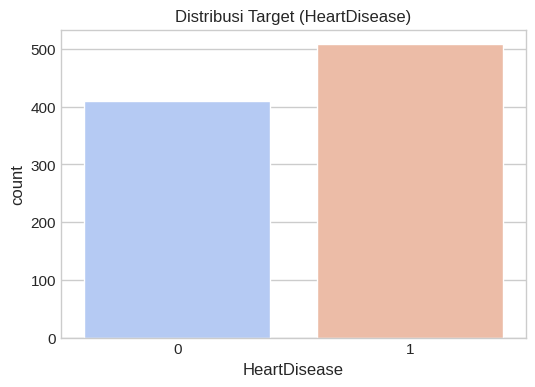

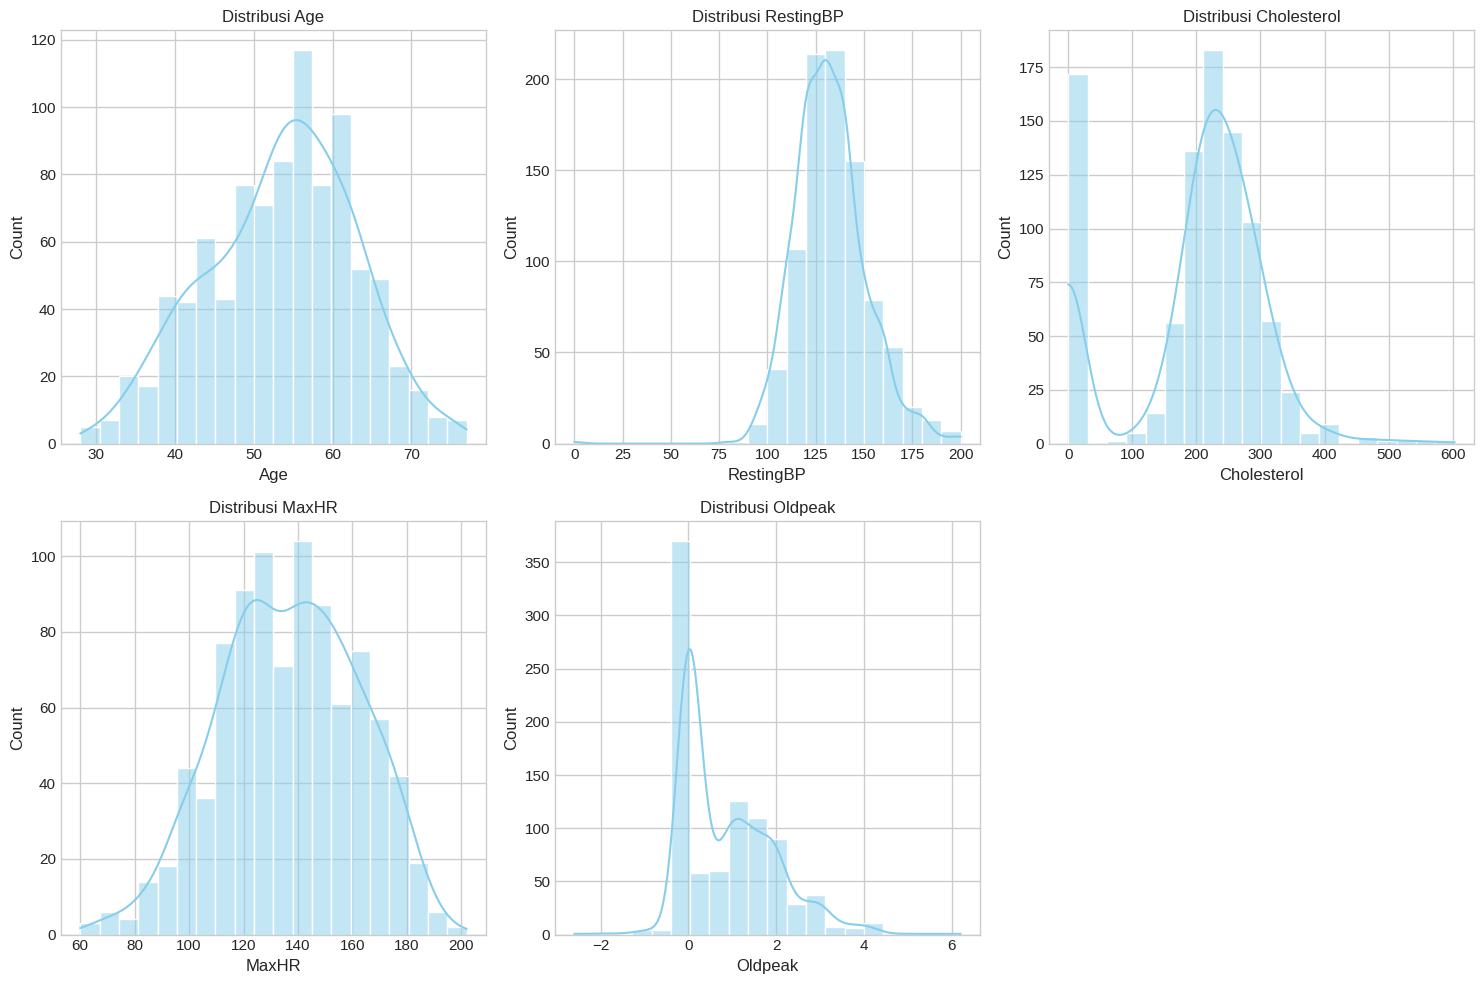

In [11]:
# 1. Distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='HeartDisease', palette='coolwarm')
plt.title('Distribusi Target (HeartDisease)')
plt.show()

# 2. Distribusi Fitur Numerik
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

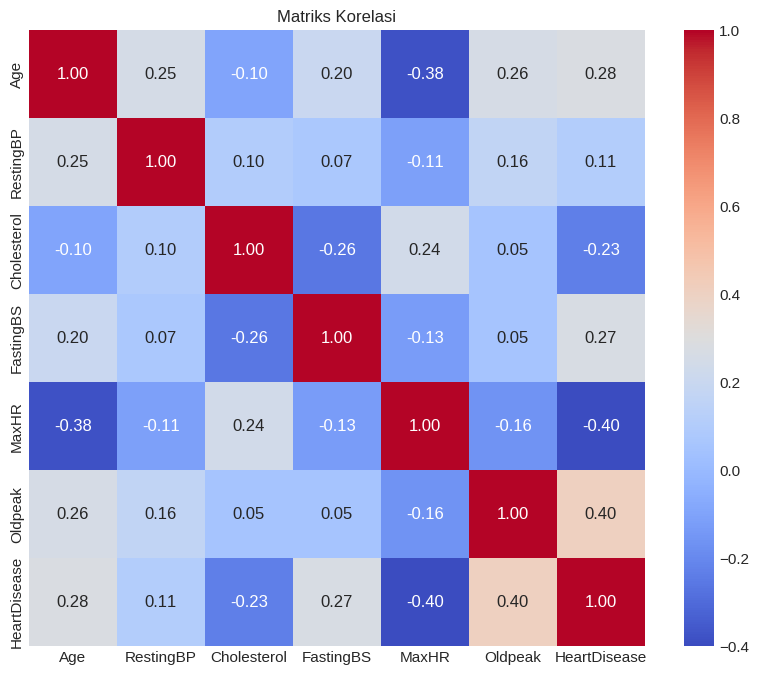

In [12]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
# 1. Hapus Duplikat
df_clean = df.drop_duplicates()
print(f"Dimensi data setelah drop duplikat: {df_clean.shape}")

# 2. Pemisahan Fitur dan Target
X = df_clean.drop('HeartDisease', axis=1)
y = df_clean['HeartDisease']

# 3. Identifikasi Kolom
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# 4. Pipeline Preprocessing
# Numerik: Standard Scaling
# Kategorikal: OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# 5. Transformasi Data
X_processed = preprocessor.fit_transform(X)

# Ambil nama kolom baru setelah OneHotEncoder
# Ini penting agar dataframe hasil olahan tetap memiliki nama kolom
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
new_columns = num_features + list(ohe_feature_names)

# Konversi kembali ke DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=new_columns)

print("Preprocessing Selesai.")
print("Shape Data:", X_processed_df.shape)
X_processed_df.head()

Dimensi data setelah drop duplikat: (918, 12)
Preprocessing Selesai.
Shape Data: (918, 15)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
# Cell 8: Split Data dan Simpan (Khusus Google Colab)

# 1. Split Data 80:20
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# 2. Tentukan Lokasi Folder di Colab (Path Absolute)
output_dir = '/content/heart_failure_preprocessing'

# Buat folder jika belum ada
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Folder baru dibuat: {output_dir}")

# 3. Simpan CSV ke dalam folder tersebut
print("Menyimpan file CSV...")
X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)

print(f"Sukses! Data tersimpan di folder Colab: {output_dir}")
print("="*30)

# 4. DOWNLOAD OTOMATIS (Agar file masuk ke laptop Anda untuk Kriteria 2)
# Kita zip dulu agar downloadnya cuma 1 file
import shutil
shutil.make_archive('/content/dataset_preprocessing', 'zip', output_dir)

print("Sedang mengunduh file ZIP ke komputer Anda...")
files.download('/content/dataset_preprocessing.zip')

Folder baru dibuat: /content/heart_failure_preprocessing
Menyimpan file CSV...
Sukses! Data tersimpan di folder Colab: /content/heart_failure_preprocessing
Sedang mengunduh file ZIP ke komputer Anda...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>